# Iteration 0: Intuition based model

## Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

## Import data

In [3]:
raw_df = pd.read_csv('../data/housing_iteration_0_2_classification/housing_iteration_0_2_classification.csv')
raw_df

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


Split off labels:

In [4]:
X = raw_df.copy()
y = X.pop('Expensive')

Split into training vs. test set:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
len(X_train), len(X_test), len(y_train), len(y_test)

(1095, 365, 1095, 365)

In [6]:
X_train.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
count,1095.000000,903.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,10529.613699,70.217054,1062.878539,2.863927,0.603653,3.086758,1.769863,96.478539,15.017352
std,10129.726538,24.904150,444.246717,0.822848,0.642767,42.066335,0.763666,126.948619,55.421772
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,59.000000,795.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,9364.000000,70.000000,996.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,11641.000000,80.000000,1307.500000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,440.000000


_LotFrontage_ has some missing rows.

## Data distribution by label

/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

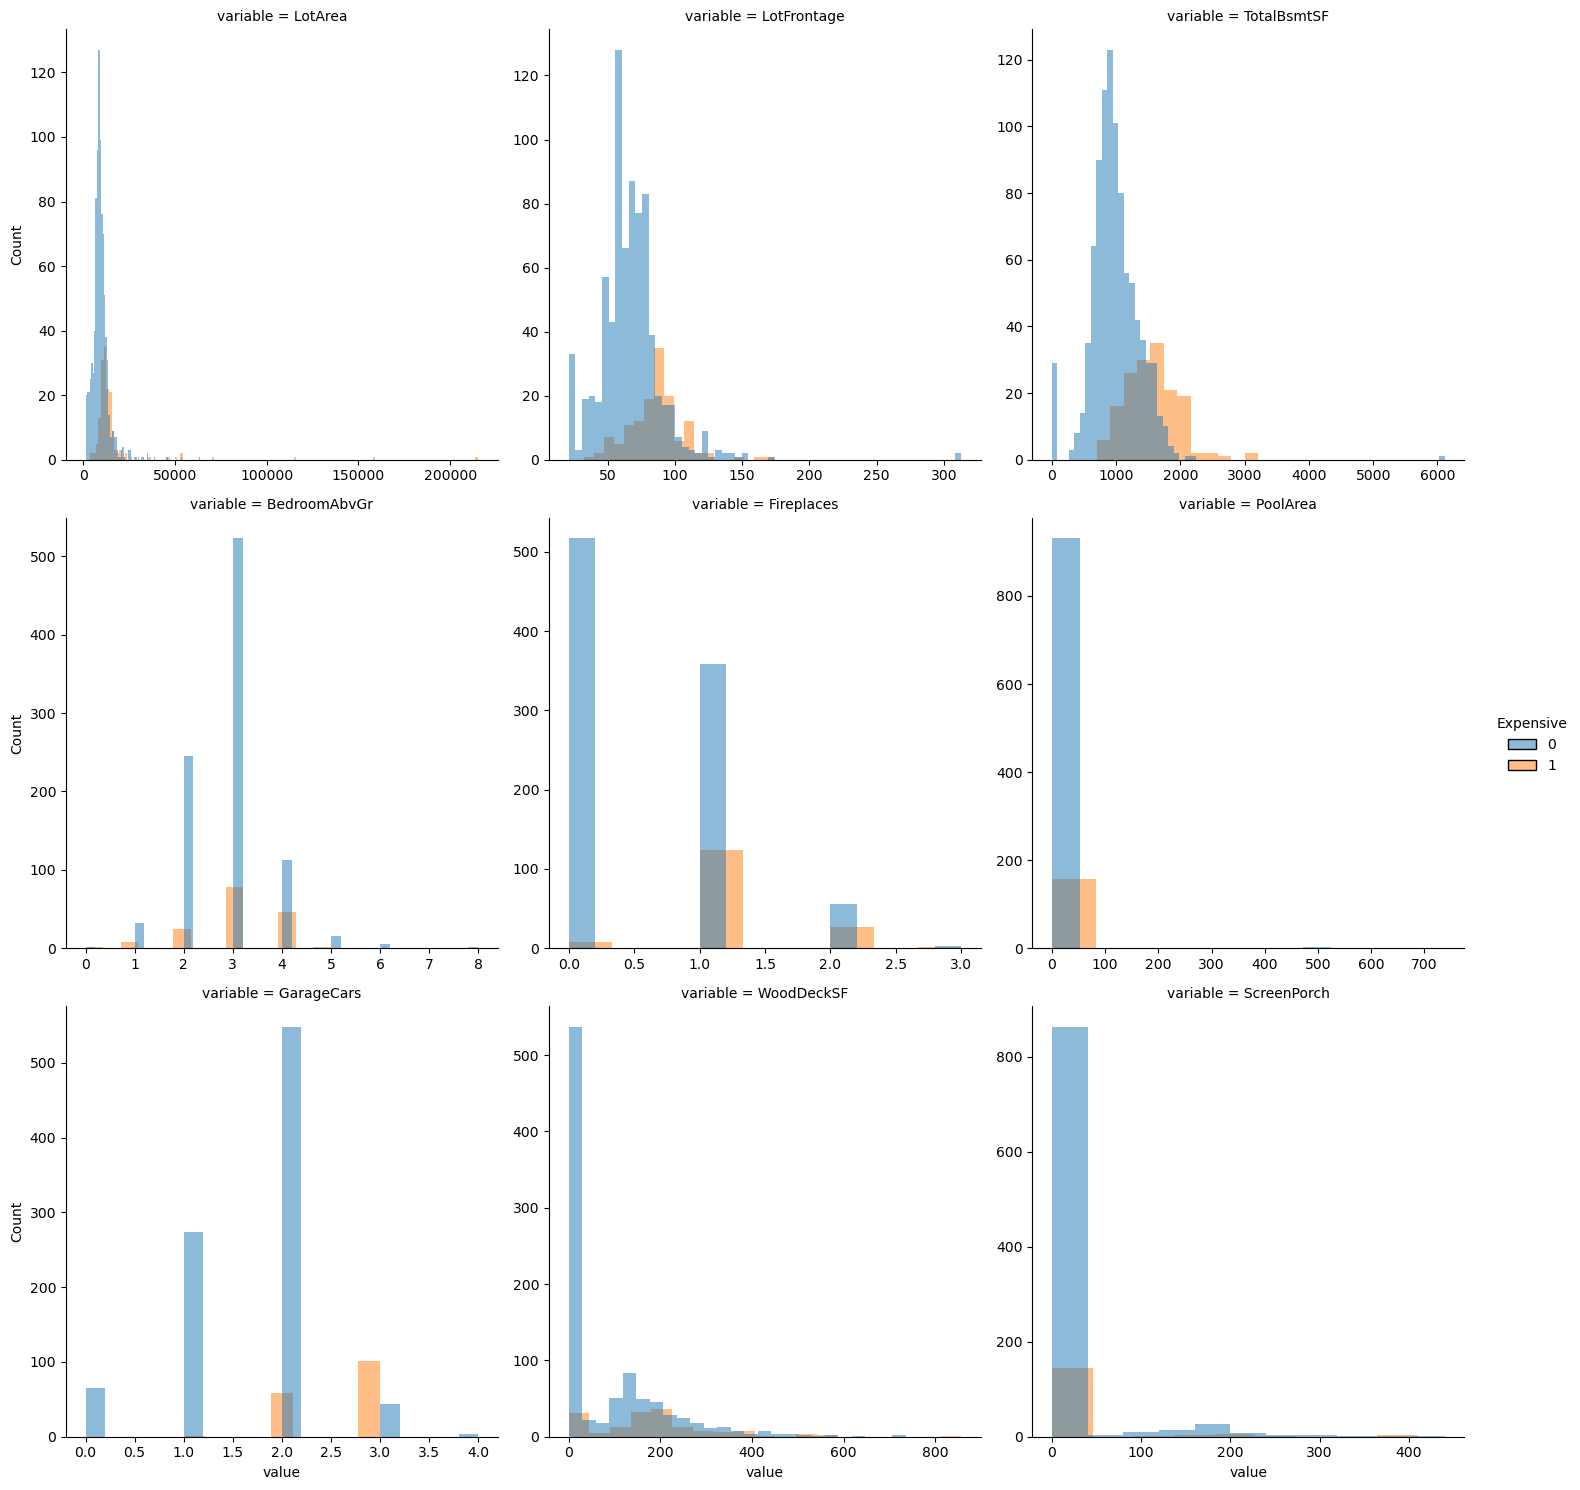

In [7]:
sns.displot(
  data=X_train.melt(ignore_index=False).join(y_train).reset_index(),
  x='value',
  col='variable',
  hue='Expensive',
  #kind='kde',
  col_wrap=3,
  common_bins=False,
  facet_kws = dict(sharex=False, sharey=False)
);

## Approach: Naive estimation function

In [8]:
def estimate_expensive(X, totalBsmtSFThresh = 900, lotThresh = 9100, garageCarsThresh = 2):
  return X.TotalBsmtSF > totalBsmtSFThresh and X.LotArea > lotThresh and X.GarageCars > garageCarsThresh

### Optimizing threshold parameters

In [9]:
ranges = {
  'totalBsmtSFThresh': range(0,2000,50),
  'lotThresh': range(0,20000,100),
  'garageCarsThresh': range(0, 4)
}

In [10]:
def largest_kv(x):
  k = max(x, key=x.get)
  return (k, x[k])

In [11]:
for par, r in ranges.items():
  print(f'best {par}:',
    largest_kv({ thresh: accuracy_score(
      y_pred=X_train.apply(lambda x: estimate_expensive(x, **{par: thresh}), axis=1),
      y_true=y_train)
      for thresh in r})
  )

best totalBsmtSFThresh: (900, 0.9168949771689497)
best lotThresh: (8700, 0.9168949771689497)
best garageCarsThresh: (2, 0.9168949771689497)


## Final scores

On training set:

In [12]:
accuracy_score(
  y_pred=X_train.apply(estimate_expensive, axis=1),
  y_true=y_train)

0.9168949771689497

On test set:

In [13]:
accuracy_score(
  y_pred=X_test.apply(estimate_expensive, axis=1),
  y_true=y_test)

0.9013698630136986

On complete set:

In [14]:
accuracy_score(
  y_pred=X.apply(estimate_expensive, axis=1),
  y_true=y)

0.913013698630137